## Lens Challenge 2.0 - Classification

### Define config

In [2]:
"""
Deep Bayesian strong lensing code

@author(s): Manuel Blanco Valentín (mbvalentin@cbpf.br)
            Clécio de Bom (clecio@debom.com.br)
            Brian Nord
            Jason Poh
            Luciana Dias
"""

""" Basic Modules """

###### Possible error
###### error OOM - reduction batch size and after limits gpus
import tensorflow as tf
import os

data_folder = '/home/dados229/luciana/BayesianProjects/BayesianChallenge2/deepbayesianstronglensing-master/data/DataChallenge2'

os.environ["CUDA_VISIBLE_DEVICES"] = '3'
"""
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
"""
import numpy as np

""" Execution time measuring """
from time import time
import matplotlib
from utils._time import ElapsedTime

""" keras backend to clear session """
import keras.backend as K

""" Ignore warnings (for log visualization sake)"""
import warnings
warnings.filterwarnings("ignore")

""" Load fits data """
#from astropy.io import fits

""" utility for progressbar """
from keras.utils import Progbar

""" Matplotlib """
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_dir = '/home/dados4t/DataChallenge2/'

images_vis = np.load(os.path.join(data_dir,'images_vis_normalized.npy'))
images_hjy = np.load(os.path.join(data_dir,'images_hjy_normalized.npy'))
#images_hjy = images_hjy[:,:,:,2:]
files = np.load(os.path.join(data_dir,'test_catalog.npy'))
print(images_vis.shape)
print(images_hjy.shape)


(99991, 200, 200, 1)
(99991, 66, 66, 3)


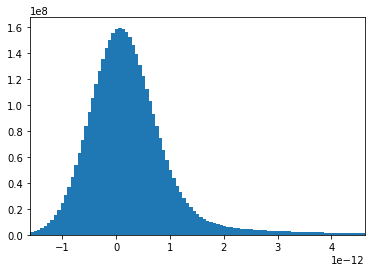

In [4]:
vis_p_max = 4.623768815742446e-12
vis_p_min = -1.5977605523354033e-12

plt.hist(images_vis.ravel(), bins=np.linspace(vis_p_min, vis_p_max, 100))
plt.xlim(vis_p_min, vis_p_max)

plt.show()

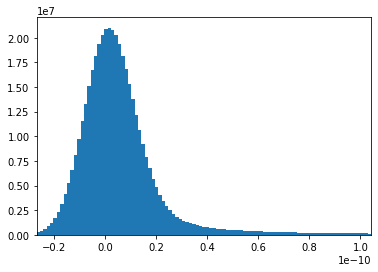

In [6]:
y_p_max = 1.0428637467474342e-10
y_p_min = -2.6795723626071855e-11

plt.hist(images_hjy[:,:,:,2:].ravel(), bins=np.linspace(y_p_min, y_p_max, 100))
plt.xlim(y_p_min, y_p_max)
plt.show()

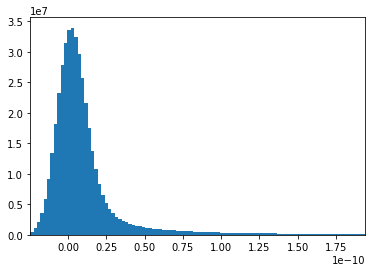

In [4]:
h_p_max = 1.9406750095818282e-10
h_p_min = -2.4760928082207426e-11

plt.hist(images_hjy[:,:,:,0].ravel(), bins=np.linspace(h_p_min, h_p_max, 100))
plt.xlim(h_p_min, h_p_max)
plt.show()

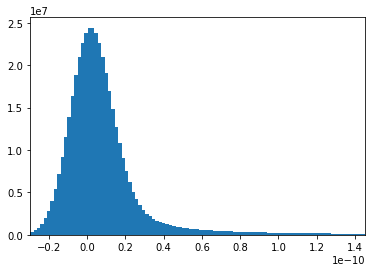

In [5]:
j_p_max = 1.4528640790434366e-10
j_p_min = -2.973456141031121e-11

plt.hist(images_hjy[:,:,:,1].ravel(), bins=np.linspace(j_p_min, j_p_max, 100))
plt.xlim(j_p_min, j_p_max)
plt.show()

In [9]:
#VIS

images_vis = np.clip(images_vis, vis_p_min, vis_p_max)
images_vis = (images_vis - vis_p_min)/(vis_p_max - vis_p_min)
print(images_vis.min(), images_vis.max())

np.save(os.path.join(data_dir,'test_images_vis_normalized.npy'), images_vis)

0.0 1.0


In [7]:
#Y

images_hjy[:,:,:,2] = np.clip(images_hjy[:,:,:,2], y_p_min, y_p_max)
images_hjy[:,:,:,2] = (images_hjy[:,:,:,2] - y_p_min)/(y_p_max - y_p_min)
print(images_hjy[:,:,:,2].min(), images_hjy[:,:,:,2].max())

#np.save(os.path.join(data_dir,'test_images_y_normalized.npy'), images_hjy)

0.0 1.0


In [8]:
#H

images_hjy[:,:,:,0] = np.clip(images_hjy[:,:,:,0], h_p_min, h_p_max)
images_hjy[:,:,:,0] = (images_hjy[:,:,:,0] - h_p_min)/(h_p_max - h_p_min)
print(images_hjy[:,:,:,0].min(), images_hjy[:,:,:,0].max())

0.0 1.0


In [9]:
#J

images_hjy[:,:,:,1] = np.clip(images_hjy[:,:,:,1], j_p_min, j_p_max)
images_hjy[:,:,:,1] = (images_hjy[:,:,:,1] - j_p_min)/(j_p_max - j_p_min)
print(images_hjy[:,:,:,1].min(), images_hjy[:,:,:,1].max())

0.0 1.0


In [10]:
np.save(os.path.join(data_dir,'test_images_hjy_normalized.npy'), images_hjy)

In [5]:
import cv2

resized = []
for i in range(images_vis.shape[0]):
    tmp = cv2.resize(images_vis[i], (192,192))
    tmp = tmp.reshape(192,192,1)
    
    
    resized.append(tmp)
    
    """
    if i == 0:
        resized = tmp
    else:
        resized = np.concatenate([resized,tmp], axis=0)
    """
resized = np.stack(resized, axis=0)
resized.shape

(99991, 192, 192, 1)

In [6]:
np.save(os.path.join(data_dir,'images_vis_normalized_resized.npy'), resized)

In [8]:
import cv2

resized = []
for i in range(images_hjy.shape[0]):
    tmp = cv2.resize(images_hjy[i,:,:,2:], (64,64))
    tmp = tmp.reshape(64,64,1)
    
    
    resized.append(tmp)
    
    """
    if i == 0:
        resized = tmp
    else:
        resized = np.concatenate([resized,tmp], axis=0)
    """
resized = np.stack(resized, axis=0)
resized.shape

(99991, 64, 64, 1)

In [9]:
np.save(os.path.join(data_dir,'images_y_normalized_resized.npy'), resized)